In [ ]:
# 1. 목표설정
# 2. 데이터 불러오기
# 3. 데이터 확인(결측치 파악) -> 전처리
# 4. EDA 기술 통계량 파악
# 5. 모델선택, 학습, 평가

In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv("./data/mushroom.csv")
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# 데이터의 정보 확인
data.info()
# 결측치 없음
# 데이터 타입 -> oject ( 문자열 or 복합형 데이터 ) -> 인코딩 필요
# 사이킷런 알고리즘에서 문자열값을 입력값으로 허용하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# 데이터의 크기 확인
data.shape
# feature 22 + label 1 = 23 column

(8124, 23)

### 문제와 답으로 분리
- 문제(X,특성,속성,특징,피처,독립변수) : poisonous를 제외한 모든 컬럼
- 답(y,라벨,레이블,target,종속변수) : poisonous

In [5]:
# 문제, 답
X = data.iloc[:,1:]
y = data['poisonous']

In [6]:
print(X.shape)
print(y.shape)

(8124, 22)
(8124,)


In [7]:
# X 문제 데이터으 기술 통계량 확인
X.describe()

# 숫자 데이터가 있는 컬럼들 -> 평균, 최대,최소,사분위수
# 버섯데이터 전부 문자열 -> 다른 결과 출력
# count : 데이터의 개수
# unique : 등장한 알파벳 개수 (유일힌)
# top : 가장 많이 등장한 알파벳 출력
# freq : top 알파벳의 빈도수 (등장 횟수)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,4,9,9,1,4,3,5,9,6,7
top,x,y,n,f,n,f,c,b,b,t,...,s,w,w,p,w,o,p,w,v,d
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
# y 정답데이터의 횟수 확인
y.value_counts()

e    4208
p    3916
Name: poisonous, dtype: int64

### 데이터 전처리
- 문자데이터 -> 수치화 (인코딩)
- 인코딩 방법 2가지
    1. 원핫인코딩
    2. 레이블인코딩

In [9]:
# 원핫인코딩 (one_hot encoding) : 값의 크고 작음, 우선순위가 없을 때 사용
# 원핫인코딩 도구 : pandas에서 제공 -> pd.get_dummies(데이터)
# 모든 특성을 담고 있는 변수 X 대입
X_one_hot = pd.get_dummies(X)
X_one_hot.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
# 추가 ) 레이블인코딩 : 값의크고 작음이 의미있는 경우, 우선순위를 주어 인코딩 할 때 사용
# 예시로 서식지 데이터 레이블 인코딩 해보기 (habitat)

test = X['habitat']
test.unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

In [11]:
# mapping 작업 -> 딕셔너리로 매핑 (우선순위를 주고 싶은 알파벳에 큰 숫자)

dic = {'u':2, 'g':1, 'm':5, 'd':4, 'p':3, 'w':7, 'l':6}
test.map(dic)

# 각각 연결해준 번호로 인코딩 완료

0       2
1       1
2       5
3       2
4       1
       ..
8119    6
8120    6
8121    6
8122    6
8123    6
Name: habitat, Length: 8124, dtype: int64

In [12]:
# X_train, X_test, y_train,y_test 
# random_state=7, train:test = 7:3
X_train, X_test, y_train,y_test = train_test_split(X_one_hot,y, test_size=0.3, random_state=7)
print("훈련용 문제 X: ", X_train.shape, "훈련용 답 y: ",  y_train.shape)
print("테스트용 문제 X: ", X_test.shape, "테스트용 답 y: ", y_test.shape)

훈련용 문제 X:  (5686, 117) 훈련용 답 y:  (5686,)
테스트용 문제 X:  (2438, 117) 테스트용 답 y:  (2438,)


### 모델링

In [13]:
# 모델 객체 생성
tree_model=DecisionTreeClassifier()

In [14]:
# 모델학습
tree_model.fit(X_train,y_train)
# 모델평가
tree_model.score(X_test,y_test)
# 정확도 1.0 -> 좋은걸까??
# 과적합 느낌 가득!!!


1.0

### 하이퍼 파라미터를 조절 한 2번째 tree 모델


In [15]:
tree_model2=DecisionTreeClassifier(max_depth=3)

tree_model2.fit(X_train,y_train)
tree_model2.score(X_test,y_test)

0.9868744872846595

### 교차검증
- 우리가 보유한 데이터 한정적이라면 과적합 제어가 어렵다
    - 1. 데이터 수집
    - 2. 교차검증 : 모델의 일반화 성능을 파악하기 위한 방법
    -> 모델이 얼마나 예측을 잘 하는지 평가하는 과정을 한번만 진행하는게 아니라 여러번 나눠서 진행하면 신뢰도가 높아짐
    - 방법 : 훈련셋 안에서 다시 한번 훈련셋, 테스트셋으로 여려겹 나누어 평가 진행

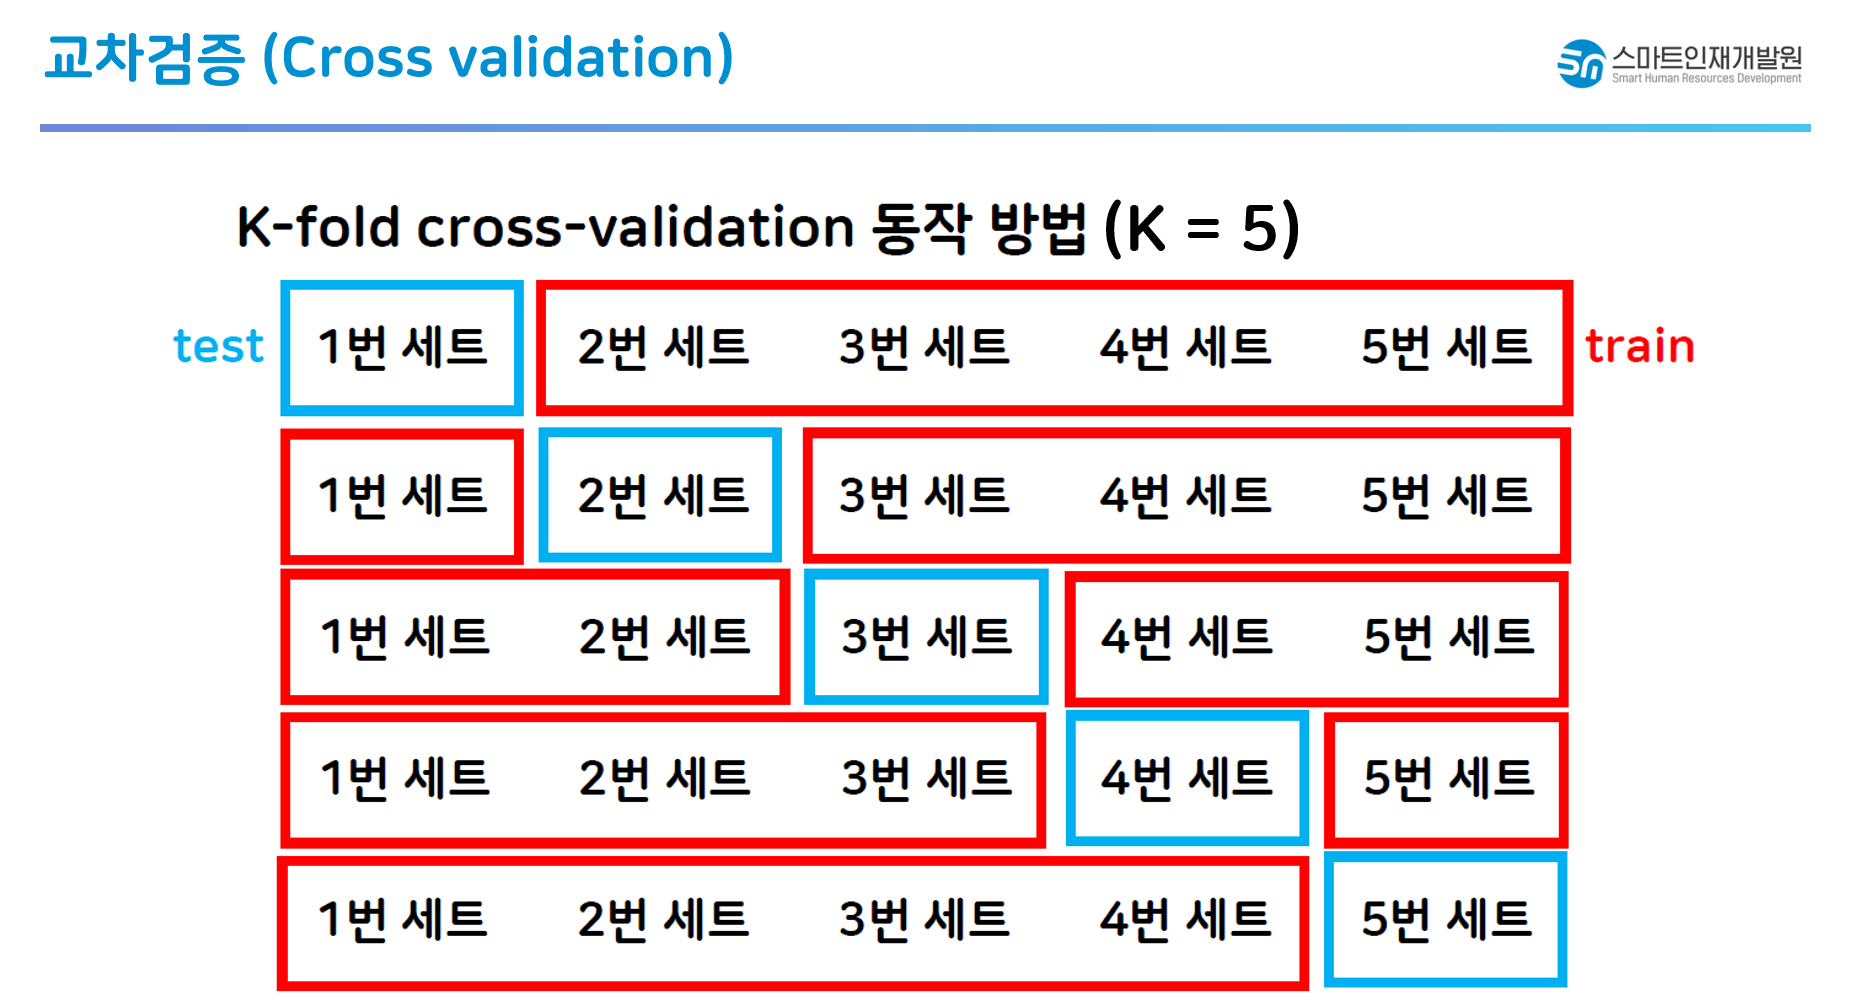

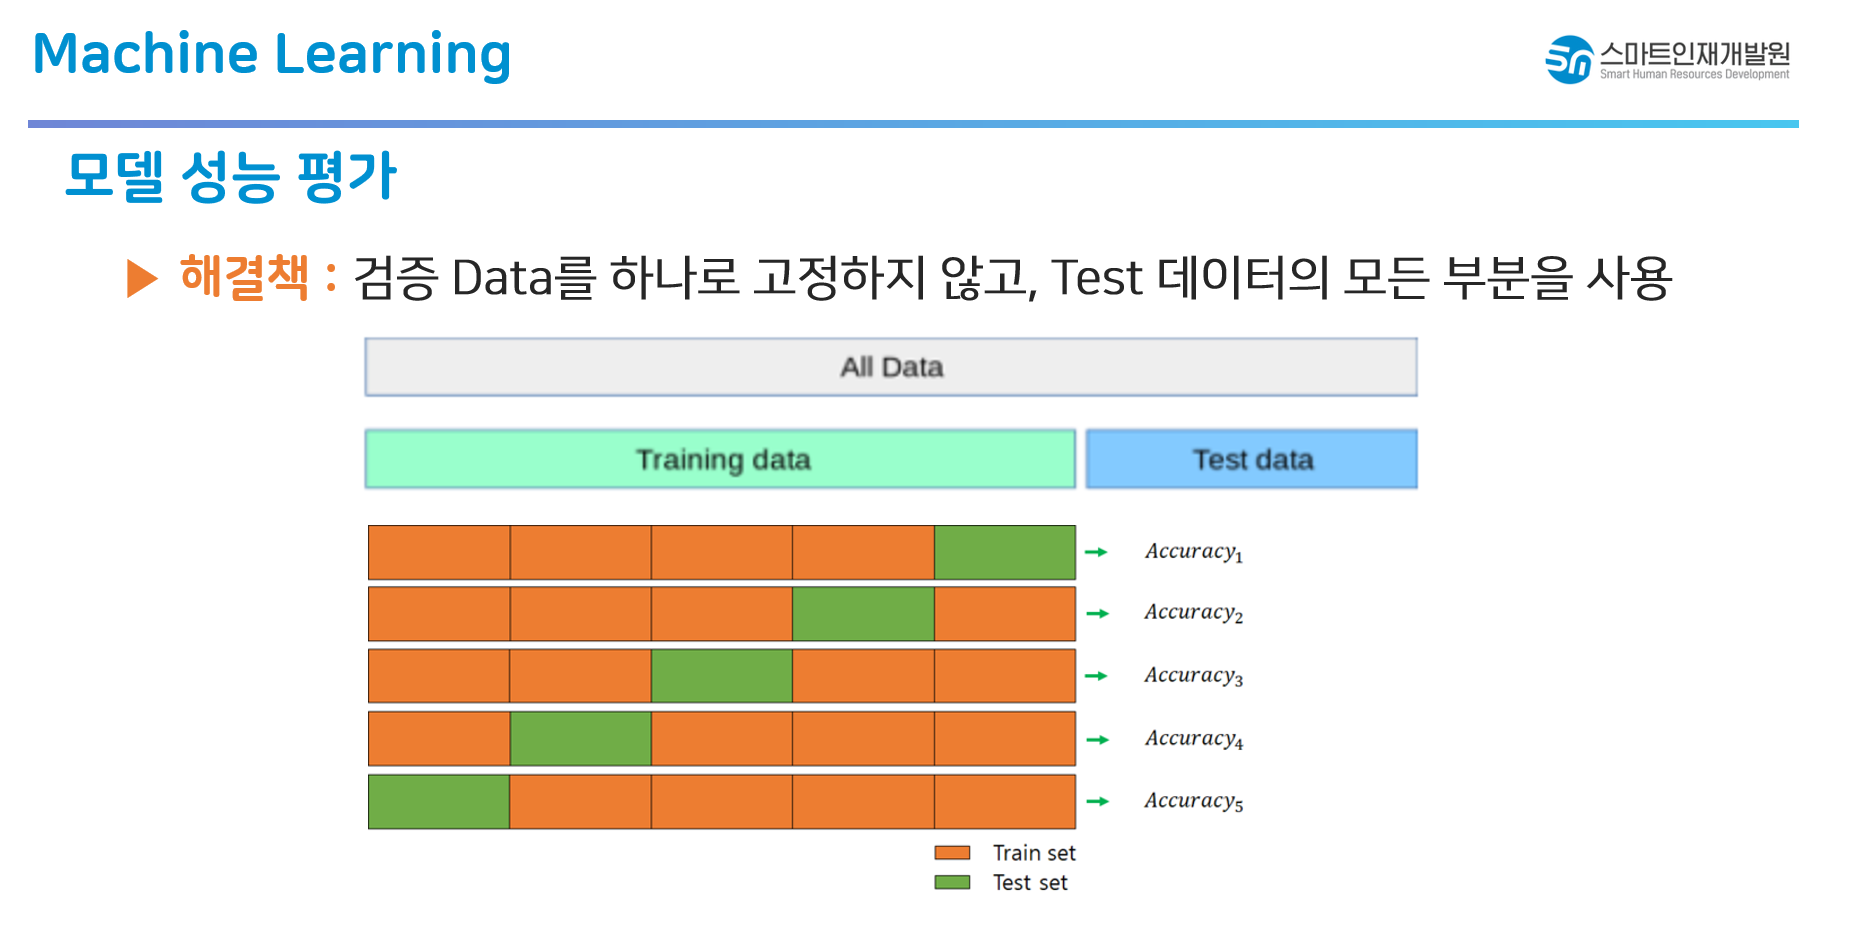

In [16]:
# 교차검증
from sklearn.model_selection import cross_val_score
# cross_val_score(모델명, 훈련문제,훈련답, cv=교차 검증 횟수)
cross_val_score(tree_model,X_train,y_train,cv=5)

# tree_model 어떤 데이터가 들어와도 비슷한 성능을 내고 있다!
# 모두 1에 가까운 정확도를 가짐 -> 일반화 성능이 높은 편..!

array([1.        , 1.        , 1.        , 0.99912049, 1.        ])

In [ ]:
# 교자 검증을 했다고 성능이 좋아지는 것은 아니다!
# 일반화 성능 정도를 파악하는 것이지 과대적합을 제어하는 것은 아님!

### tree 모델의 시각화
- 외부 라이브러리 graphviz (트리 내부를 시각화 하기 위한 라이브러리)
- 별도의 설치 진행

In [32]:
# !pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.1 MB/s eta 0:00:00


In [17]:
# tree-model 시각화
# 그래프로 내보내기
from sklearn.tree import export_graphviz

# 우리가 만든 모델을 텍스트 파일로 내보내서 그래프로 그려줄 것
# export_graphviz(a 모델이름 , out_file="경로와파일이름.dot(확장자)")
export_graphviz(tree_model,
                out_file="./data/tree.dot",   # 경로와 파일명.확장자
                class_names=['독성','식용'],   # 정답 데이터 이름 설정
                feature_names=X_one_hot.columns, # 특성의 이름
                impurity=True,  # 지니 불순도 출력 여부
                filled=True   # 각 노드들의 클래스가 구분되도록 색 칠해주는 명령어
                )

In [21]:
import os
os.environ['PATH']+=os.pathsep+'C:\\Program Files\\Graphviz\\bin\\'
# 환경설정

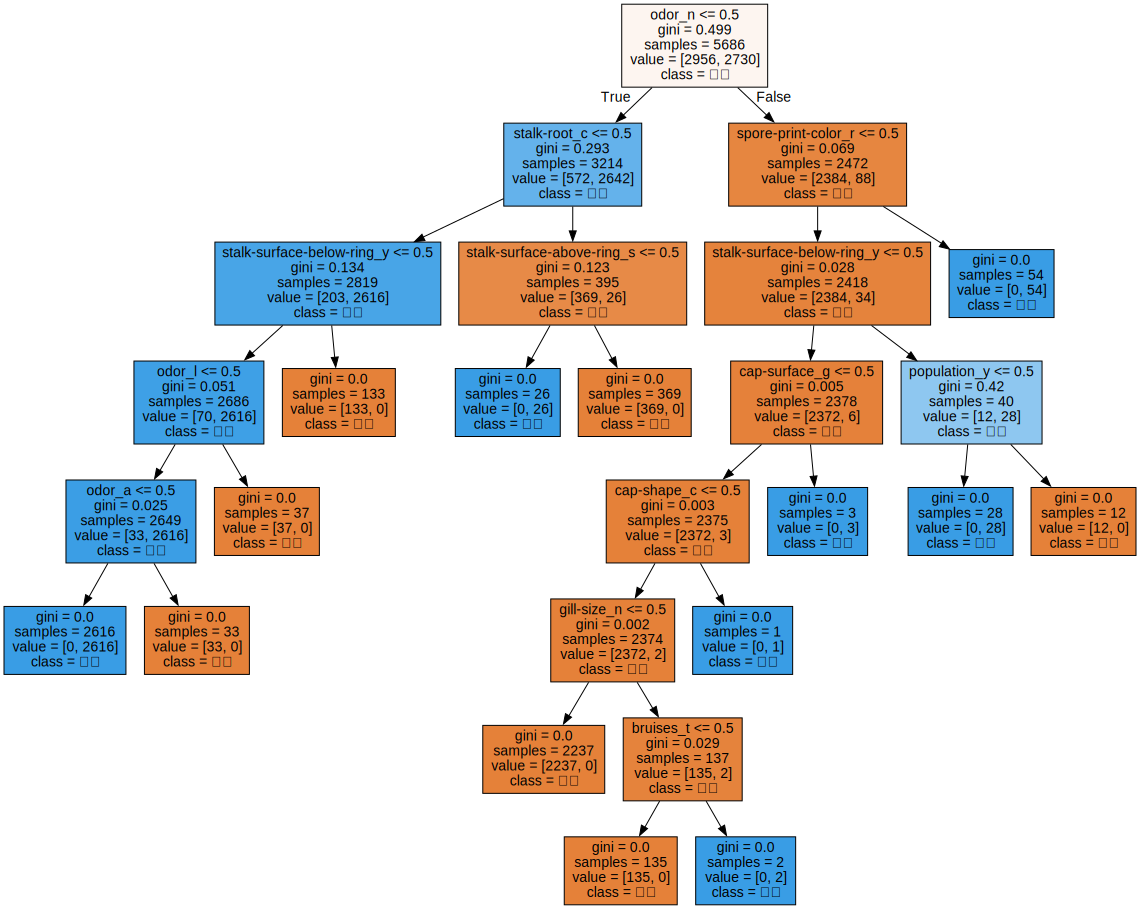

In [22]:
# export 했던 dot파일 가져와서 실제로 그래프로 표현하기
import graphviz

with open('data/tree.dot', encoding='UTF-8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [ ]:
# 특성 <= 0.5: 원핫인코딩 이후에 0 또는 1을 구분해 주는 값 / odor_n 값 판별 조건
# gini : 지니 불순도가 0에 가까울수록 불순도가 낮다
# smaples : 데이터의 개수
# value = ['독성'의 개수, '식용'의 개수] : 클래스 별 개수
# class : 예측한 정답값  - 분류했을 때 투표형식으로 더 많은 정답값을 가진 label을 말해줌

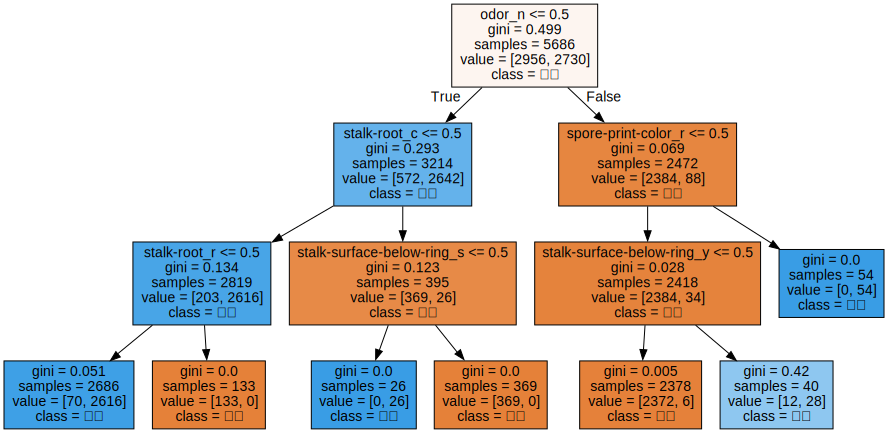

In [23]:
# tree-model 시각화
# 그래프로 내보내기
from sklearn.tree import export_graphviz

# 우리가 만든 모델을 텍스트 파일로 내보내서 그래프로 그려줄 것
# export_graphviz(a 모델이름 , out_file="경로와파일이름.dot(확장자)")
export_graphviz(tree_model2,
                out_file="./data/tree2.dot",   # 경로와 파일명.확장자
                class_names=['독성','식용'],   # 정답 데이터 이름 설정
                feature_names=X_one_hot.columns, # 특성의 이름
                impurity=True,  # 지니 불순도 출력 여부
                filled=True   # 각 노드들의 클래스가 구분되도록 색 칠해주는 명령어
                )

import graphviz

with open('data/tree2.dot', encoding='UTF-8') as f :
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 가장 적합한 하이퍼 파라미터 선택(max_depth)

In [32]:
train_list=[]
test_list=[]
n_set=[i for i in range(1,11)]
# max_depth를 1~10까지 넣어서 확인
for k in n_set:
    #모델 객체생성, 학습, 정확도
    model=DecisionTreeClassifier(max_depth=k)
    model.fit(X_train,y_train)
    train_list.append(model.score(X_train,y_train))
    test_list.append(model.score(X_test,y_test))

In [33]:
print(len(train_list))
print(len(test_list))


10
10


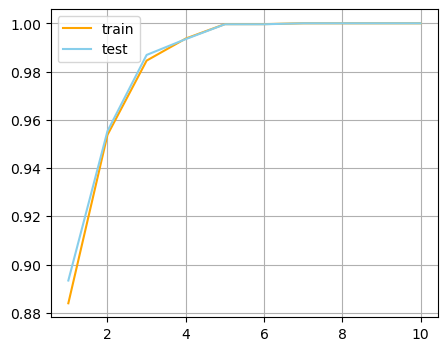

In [37]:
# 결과 한눈에 보기 어려움 -> 시각화를 통해 확인해보자
plt.figure(figsize=(5,4))
plt.plot(n_set, train_list, c='orange', label='train')
plt.plot(n_set, test_list, c='skyblue', label='test')
plt.legend()
# 눈금선
plt.grid()
plt.show()

In [ ]:
# max_depth 가 깊어질수록 정확도가 올라가는 것 확인!
# 5이상의 깊이는 정확도가 증가하지 않기 때문에 더이상 깊이를 깊게 해줄 필요가 없음

## 특성선택 ( feature selection )
- 지도학습에서는 데이터의 특성중요도를 출력해 볼 수 있음
- 각각 특성들이 얼만큼 정답에 영향을 미치는지 수치로 확인 가능
- 각 특성들은 0~1 (모든 특성들의 중요도 합은 1)
- 중요도 값이 1에 가까울수록 중요함
- tree 모델은 특성의 중요도가 높은 값부터 조건으로 선택함!

In [38]:
# 전체 컬럼 확인
X_one_hot.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [40]:
# tree모델 특성 중요도 확인
fi = tree_model.feature_importances_


In [47]:
# 위의 데이터 DataFrame으로 변경
fi_df = pd.DataFrame(fi, index=X_one_hot.columns, columns=['특성중요도'])

In [51]:
pd.set_option('display.max_rows', None)

In [52]:
# 정렬을 통해 가장 중요한 특성을 위로 올려보자
fi_df.sort_values(by='특성중요도', ascending=False)

# 트리 모델 그래프확인해보면 특성 중요도가 위에 있음 확인 가능

,특성중요도
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
odor_a,0.022962
stalk-surface-above-ring_s,0.017114
population_y,0.005919
cap-surface_g,0.002106
bruises_t,0.001389


In [ ]:
# odor_n 특성이 가장 영향력을 미치는 중요 특성임을 알 수 있음
# 트리 그림을 보면 root node에 배치되어 있는 것을 확인 해 볼 수 있다.